<a href="https://colab.research.google.com/github/NainaniJatinZ/EvaluatingUnsupervisiedMLBlog/blob/main/KMeans_Blog_Diagrams_and_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

- **What is clustering?**

Clustering is a type of unsupervised learning which is used to split unlabeled data into different groups. Clustering is generally used in Data Analysis to get to know about the different groups that may exist in our dataset.





In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13) 

In [ ]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## Creating a testing dataset

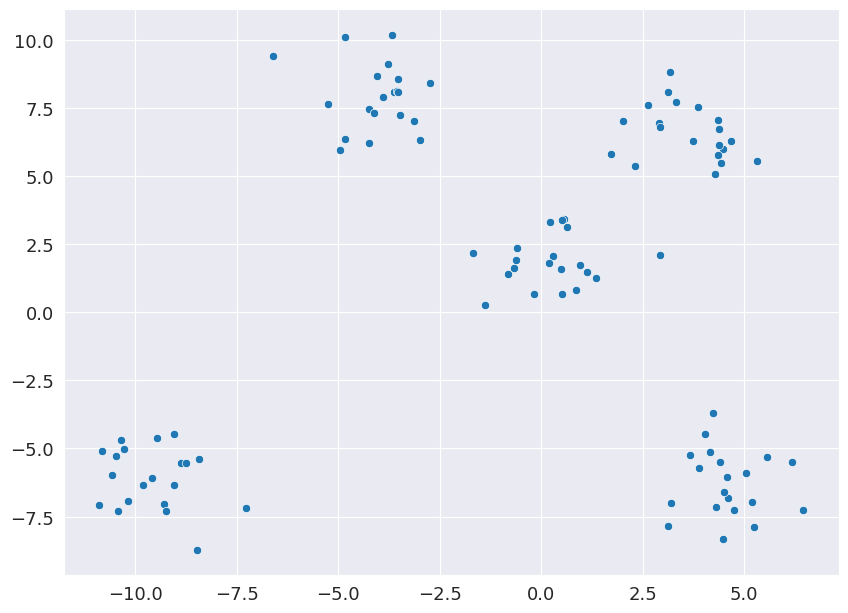

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
# plt.scatter(X[:, 0], X[:, 1]);
sns.scatterplot(X[:,0], X[:,1])

In [ ]:
m=X.shape[0]
n=X.shape[1] 
n_iter=50

In [ ]:
X

In [ ]:
X1 = X[:, 0]
X2 = X[:, 1]

## K and Means?

## How to measure distance?

Euclidean distance is the most common metric. The formula for Euclidean distance for 2 dimensions is given by:

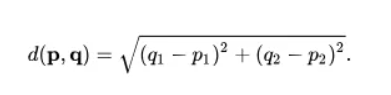

In [ ]:
# Calculate Euclidean distance between two observations
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5



In [ ]:
pointA_index = 38 #@param {type:"slider", min:0, max:100, step:1}
pointB_index = 74 #@param {type:"slider", min:0, max:100, step:1}
pointA = X[pointA_index] 
pointB = X[pointB_index]
temp_point_set = [[pointA[0], pointB[0]], [pointA[1], pointB[1]]]
tempDist = calc_distance(pointA, pointB)

Distance between point A and B is 18.417713410661186


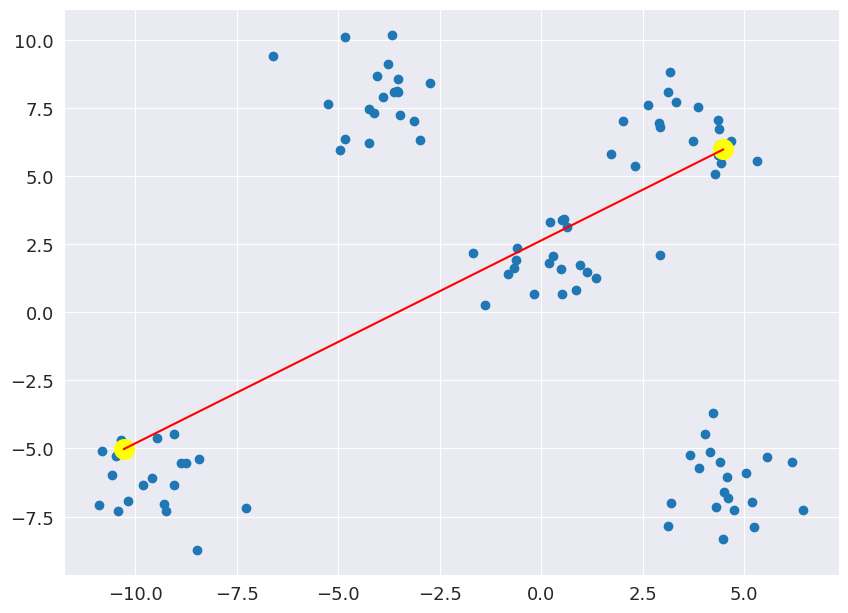

In [ ]:
#draw a line bw these two points to show distance
plt.scatter(X[:, 0], X[:, 1])
plt.plot([pointA[0], pointB[0]], [pointA[1], pointB[1]], c="red")
plt.scatter(temp_point_set[0], temp_point_set[1],s=200, c= "yellow")

print("Distance between point A and B is "+ str(tempDist))

# Steps for the Algorithm

## Step 1: Initializing K random centroids 

In [ ]:
#Randomly assign K points as centroids show them as big
K=5
# creating an empty centroid array
centroids=np.array([]).reshape(n,0) 
# creating 5 random centroids
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

In [ ]:
centroids.shape

(2, 5)

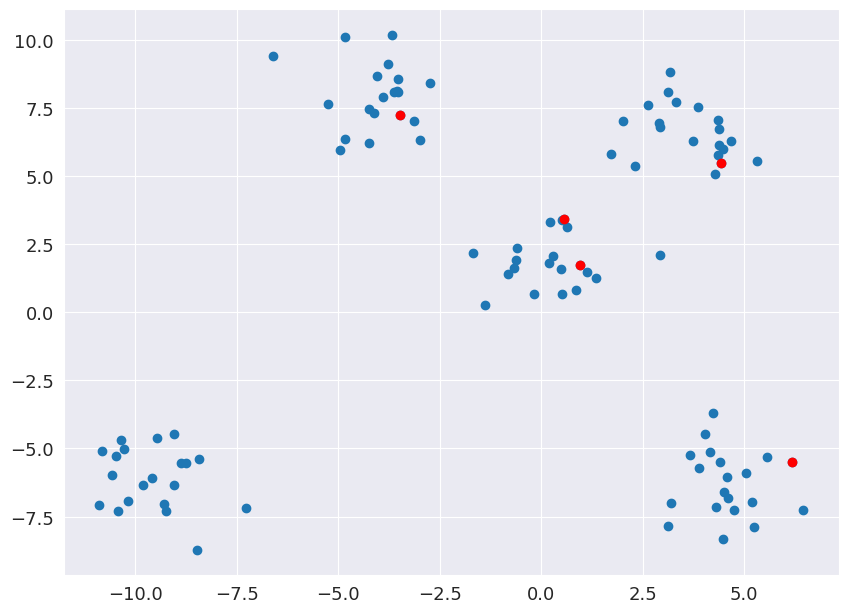

In [ ]:
plt.scatter(X[:, 0], X[:, 1]);
plt.scatter(centroids[0], centroids[1], c= "red")

## Step 2: Getting the minimum distance from each point to the centroids

In [ ]:

# creating an empty array
euclid=np.array([]).reshape(m,0)

# finding distance between data point and each centroid
for k in range(K):
       dist=np.sum((X-centroids[:,k])**2,axis=1)
       euclid=np.c_[euclid,dist]

# storing the minimum value we have computed
minimum=np.argmin(euclid,axis=1)+1

In [ ]:
minimum

array([2, 1, 4, 2, 1, 1, 3, 4, 1, 1, 1, 1, 1, 5, 1, 1, 5, 5, 4, 1, 4, 2,
       4, 1, 1, 2, 1, 2, 4, 1, 1, 3, 4, 1, 1, 4, 2, 2, 1, 5, 3, 4, 1, 1,
       3, 4, 2, 1, 1, 1, 2, 2, 3, 4, 1, 2, 1, 3, 4, 4, 1, 2, 3, 3, 4, 1,
       2, 4, 1, 2, 4, 2, 3, 2, 3, 5, 3, 2, 1, 3, 1, 4, 3, 4, 2, 3, 3, 5,
       1, 3, 4, 1, 2, 3, 1, 4, 2, 3, 3, 5])

In [ ]:
centroids[1][0]

1.7429980361673199

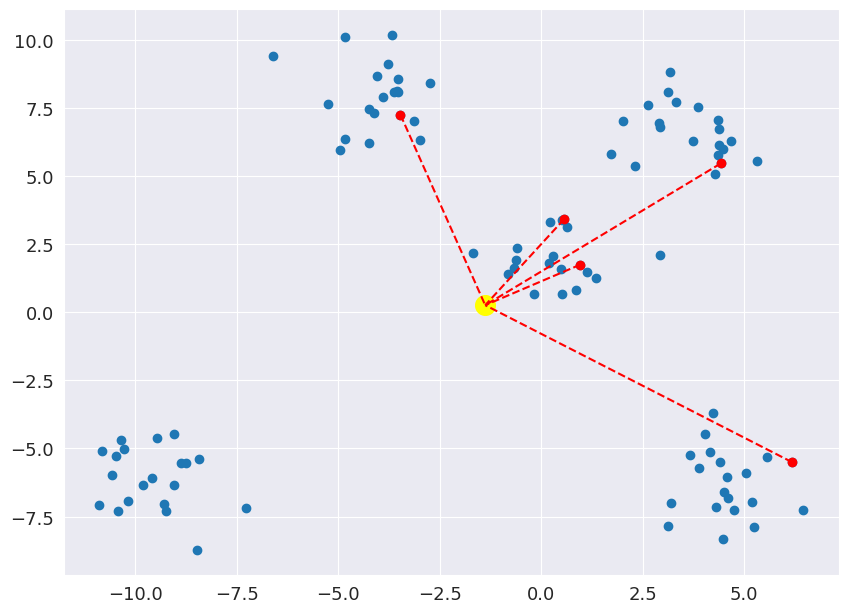

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[0], centroids[1], c= "red")
plt.scatter(X[5][0], X[5][1],s=200, c= "yellow")
plt.plot([centroids[0][0],X[5][0]], [centroids[1][0], X[5][1]], c="red", ls="--")
plt.plot([centroids[0][1],X[5][0]], [centroids[1][1], X[5][1]], c="red", ls="--")
plt.plot([centroids[0][2],X[5][0]], [centroids[1][2], X[5][1]], c="red", ls="--")
plt.plot([centroids[0][3],X[5][0]], [centroids[1][3], X[5][1]], c="red", ls="--")
plt.plot([centroids[0][4],X[5][0]], [centroids[1][4], X[5][1]], c="red", ls="--")

## Step 3:Assigning each point to a centroid based on minimum distance

In [ ]:
#Creating an empty dictionary 
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

In [ ]:
cent

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64),
 4: array([], shape=(2, 0), dtype=float64),
 5: array([], shape=(2, 0), dtype=float64)}

In [ ]:
#Adding each data point to the respective cluster
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]

#Taking the transpose for better data handling
for k in range(K):
    cent[k+1]=cent[k+1].T

In [ ]:
cent

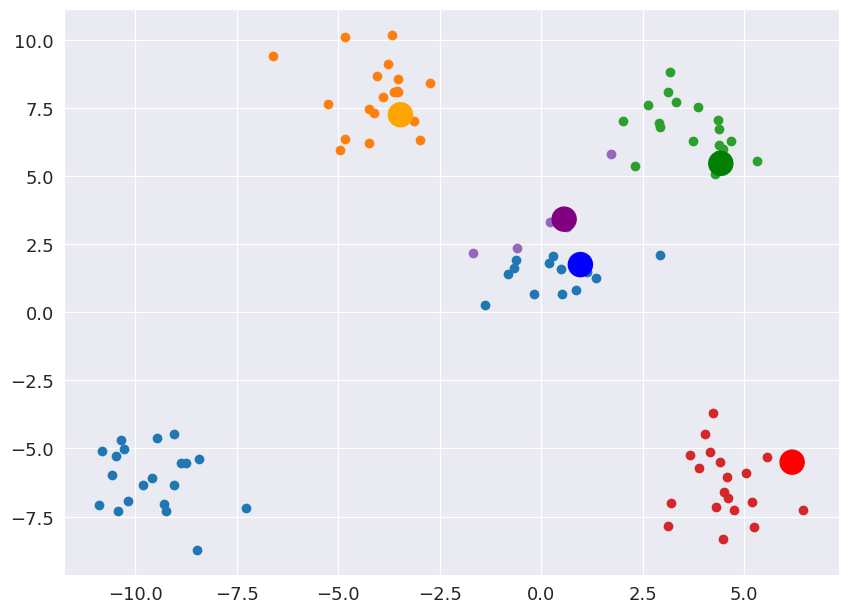

In [ ]:
#Seeing the current cluster after 1 iteration
colormap = np.array(['blue', 'orange', 'green', 'red', 'purple'])
for k in range(K):
    plt.scatter(cent[k+1][:,0],cent[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c=colormap)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

## Step 4: Updating the Centroids

In [ ]:
centroids_new = centroids.copy()
for k in range(K):
     centroids_new[:,k]=np.mean(cent[k+1],axis=0)

In [ ]:
centroids[0]

array([ 0.96675957, -3.46721485,  4.42632723,  6.18289166,  0.56609951])

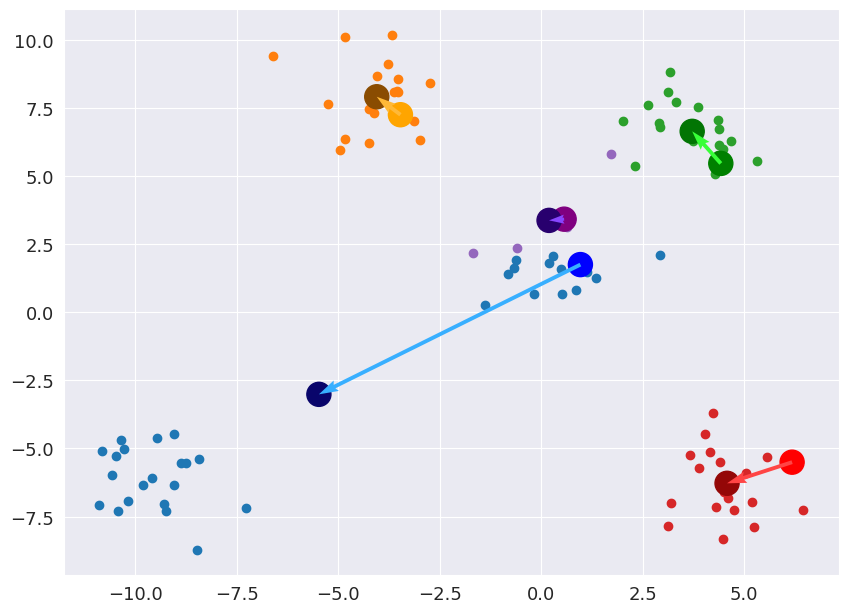

In [ ]:
#Observing the shift in Centroids 
colormap = np.array(['blue', 'orange', 'green', 'red', 'purple'])
colormap_arrow = np.array(['#38afff', '#ffb938', '#38ff38', '#ff4545', '#8945ff'])
colormap_new = np.array(['#09056b', '#8a4c01', '#027504', '#940707', '#28006e'])
for k in range(K):
    plt.scatter(cent[k+1][:,0],cent[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c=colormap)
plt.scatter(centroids_new[0,:],centroids_new[1,:],s=300,c=colormap_new)
# for k in range(K):
  # plt.plot([centroids_new[0,k], centroids[0,k]], [centroids_new[1,k], centroids[1,k]])
plt.quiver(centroids[0,:], centroids[1,:], centroids_new[0,:]-centroids[0,:], centroids_new[1,:]-centroids[1,:], angles='xy', scale_units='xy', width=0.005, scale=1, color=colormap_arrow)
plt.show()

## Step 5: Repeat steps 2-4 until the centroid keeps changing or till 'n_iter' Iterations  

## Iterating over the process

In [ ]:
K = 5
centroids=np.array([]).reshape(n,0) 
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

In [ ]:
for i in range(n_iter):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      varianceTemp = []
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent

In [ ]:
centroids

array([[-9.56458048,  4.58002297, -4.05050671,  0.23713963,  3.62186823],
       [-6.09665251, -6.28061932,  7.90104677,  1.85541645,  6.59111541]])

In [ ]:
# colormap_final[1]

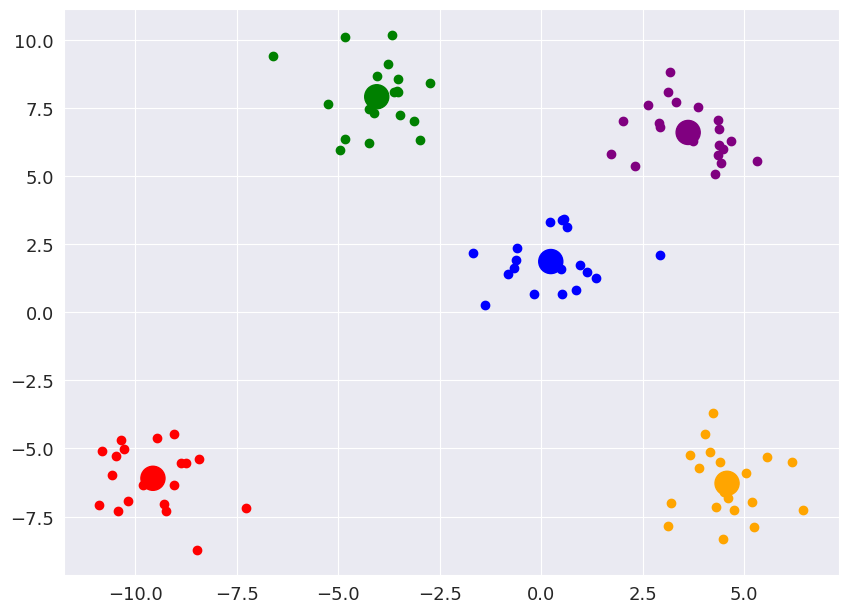

In [ ]:
colormap = np.array(['blue', 'orange', 'green', 'red', 'purple'])
colormap_final = np.array(['red', 'orange', 'green', 'blue', 'purple'])
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1], c = colormap_final[k])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c=colormap_final)
plt.show()

# Evaluation Methods

## Method 1: WCSS and Elbow method

Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares).

1. Perform K means clustering on different values of K ranging from 1 to any upper limit. Here we are taking the upper limit as 10.
2. For each K, calculate WCSS
3. Plot the value for WCSS with the number of clusters K.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. i.e the point after which WCSS doesn’t decrease more rapidly is the appropriate value of K.

In [ ]:
from sklearn.cluster import KMeans

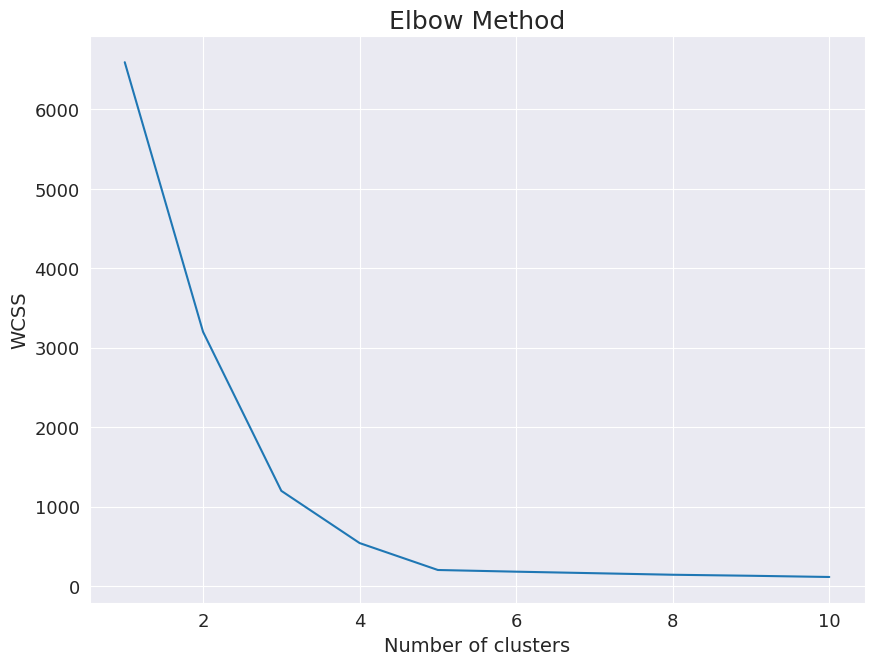

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # It is the sum of squared distances of samples to their closest cluster center.
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Kmeans++ Steps:

1. Randomly select the first centroid from the data points.
2. For each data point compute its distance from the nearest, previously chosen centroid.
3. Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)
4. Repeat steps 2 and 3 until k centroids have been sampled

**TLDR: we pick up centroids that are far away from one another.**


This increases the chances of initially picking up centroids that lie in different clusters.

## Method 2: Silhouette Analysis

In [ ]:
pointA_index = 2 #@param {type:"slider", min:0, max:100, step:1}
pointB_index = 20 #@param {type:"slider", min:0, max:100, step:1}
pointA = X[pointA_index] 
pointB = X[pointB_index]

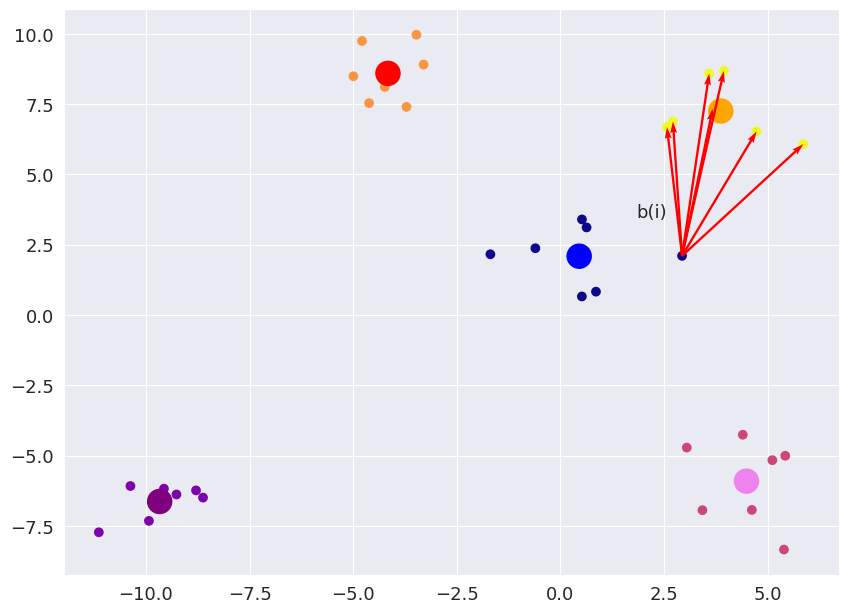

In [ ]:
colormap_sil = np.array(['blue', 'purple', 'violet', 'red', 'orange'])
plt.scatter(X[:,0], X[:,1], c = pred_y , cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c=colormap_sil)
# plt.scatter(X[15,0], X[15,1], s=100, c='orange')
# plt.scatter(X[14,0], X[14,1], s=100, c='orange')
# plt.scatter(pointA[0], pointA[1], s=100, c='blue')
# for i in range(35):
#   if pred_y[i] == 0 and i != 2:
#     plt.quiver(pointA[0], pointA[1], X[i,0] - pointA[0], X[i,1] - pointA[1], angles='xy', scale_units='xy', width=0.003, scale=1, color="red", ls = "dashed")

for i in range(35):
  if pred_y[i] == 4:
    plt.quiver(pointA[0], pointA[1], X[i,0] - pointA[0], X[i,1] - pointA[1], angles='xy', scale_units='xy', width=0.003, scale=1, color="red", ls = "dashed")

# plt.plot([X[15,0], pointA[0]], [X[15,1], pointA[1]], c = "red", ls = '--')
# plt.plot([X[14,0], X[15,0]], [X[14,1], X[15,1]], c = "red", ls = '--')
plt.annotate("b(i)", (2.2, 3), textcoords="offset points", xytext=(0,10), ha='center')
# plt.annotate("a(i)", (3, 2.3), textcoords="offset points", xytext=(0,10), ha='center')
# plt.quiver(X[15,0], X[15,1], pointA[0]-X[15,0], pointA[1]-X[15,1], angles='xy', scale_units='xy', width=0.004, scale=1, color="red", ls = "dashed")
# plt.quiver(X[15,0], X[15,1], X[14,0]-X[15,0], X[14,1]-X[15,1], angles='xy', scale_units='xy', width=0.004, scale=1, color="red", ls = "dashed")
plt.show()

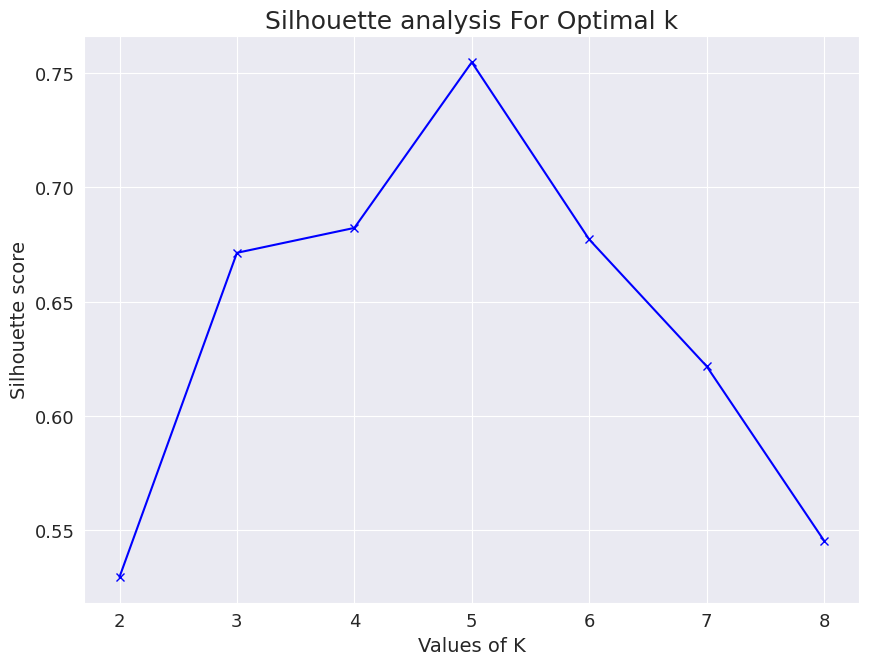

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
 # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5295676774245814
For n_clusters = 3 The average silhouette_score is : 0.6714121184680971
For n_clusters = 4 The average silhouette_score is : 0.6823156428934393
For n_clusters = 5 The average silhouette_score is : 0.7548175686198038
For n_clusters = 6 The average silhouette_score is : 0.6772697752517342


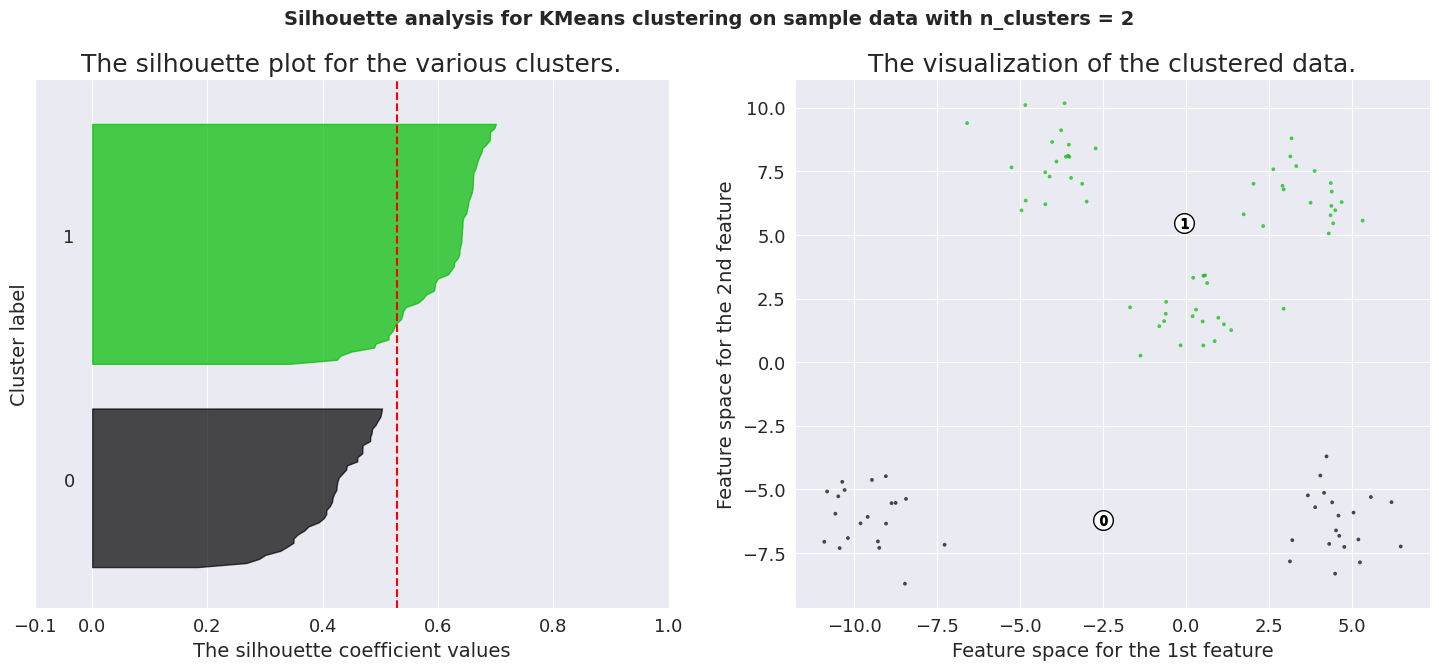

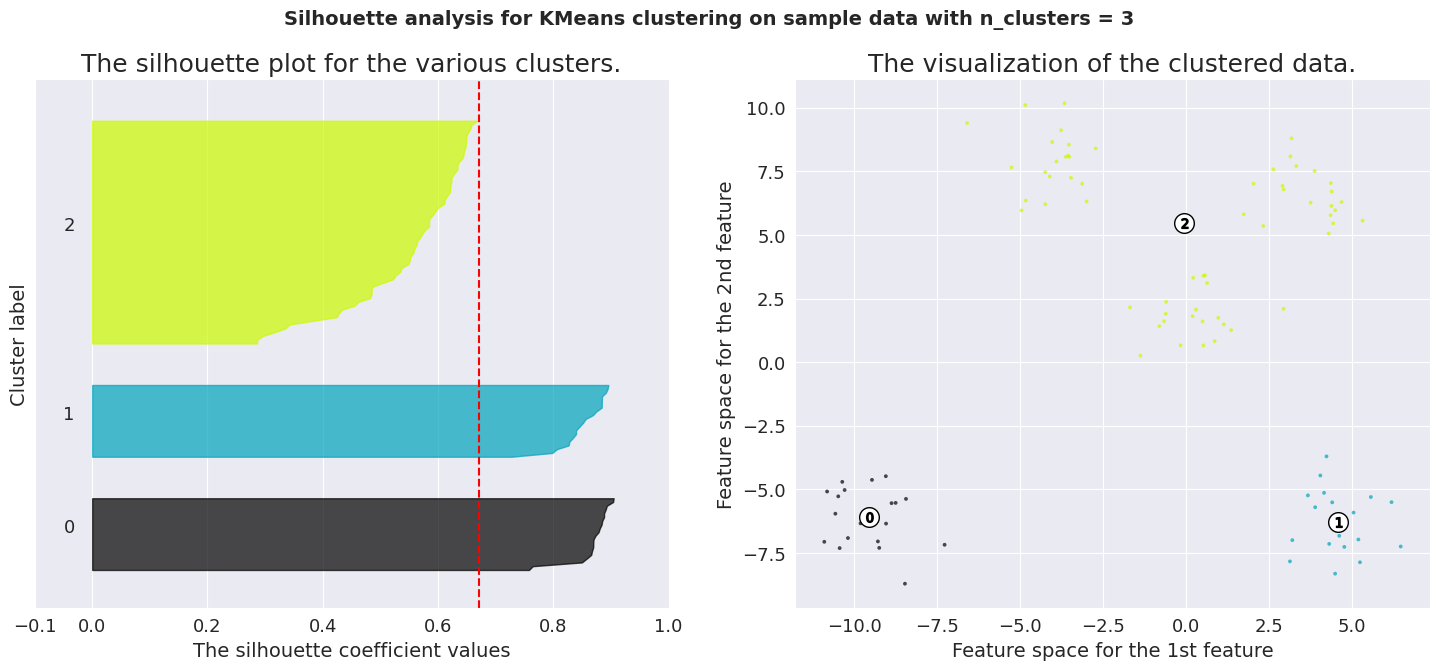

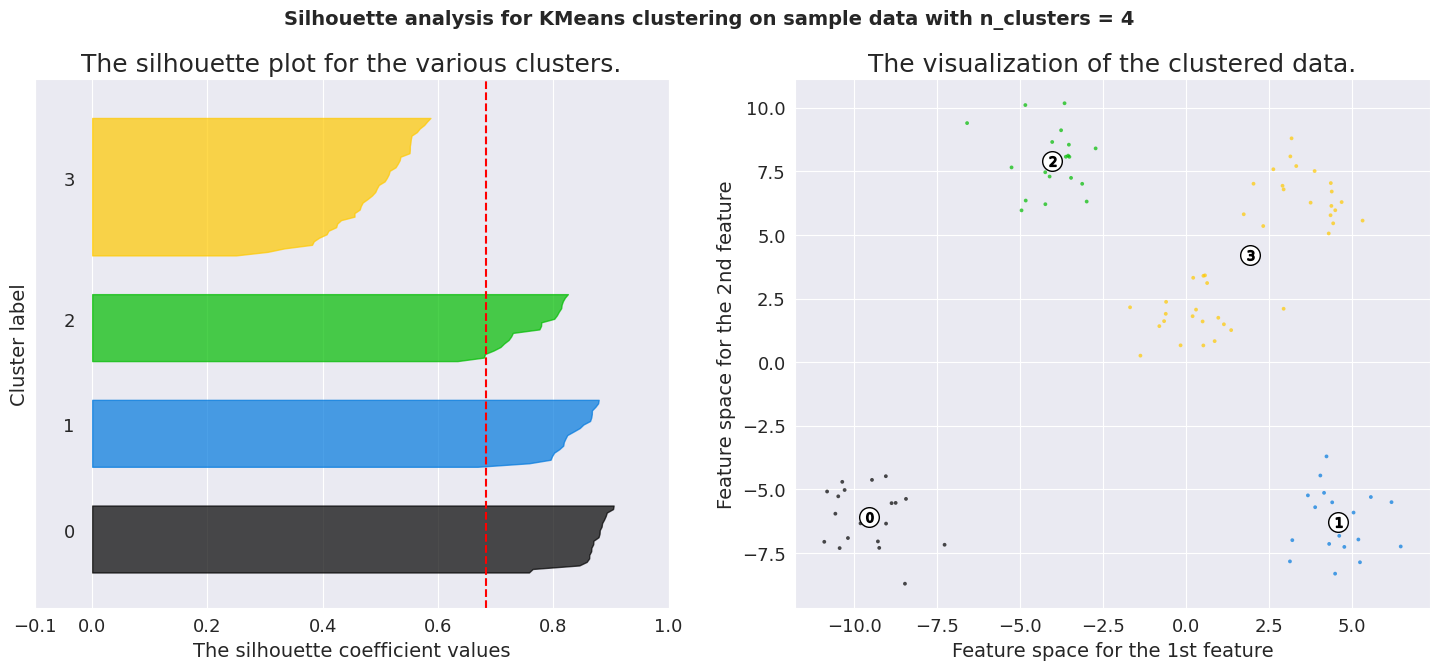

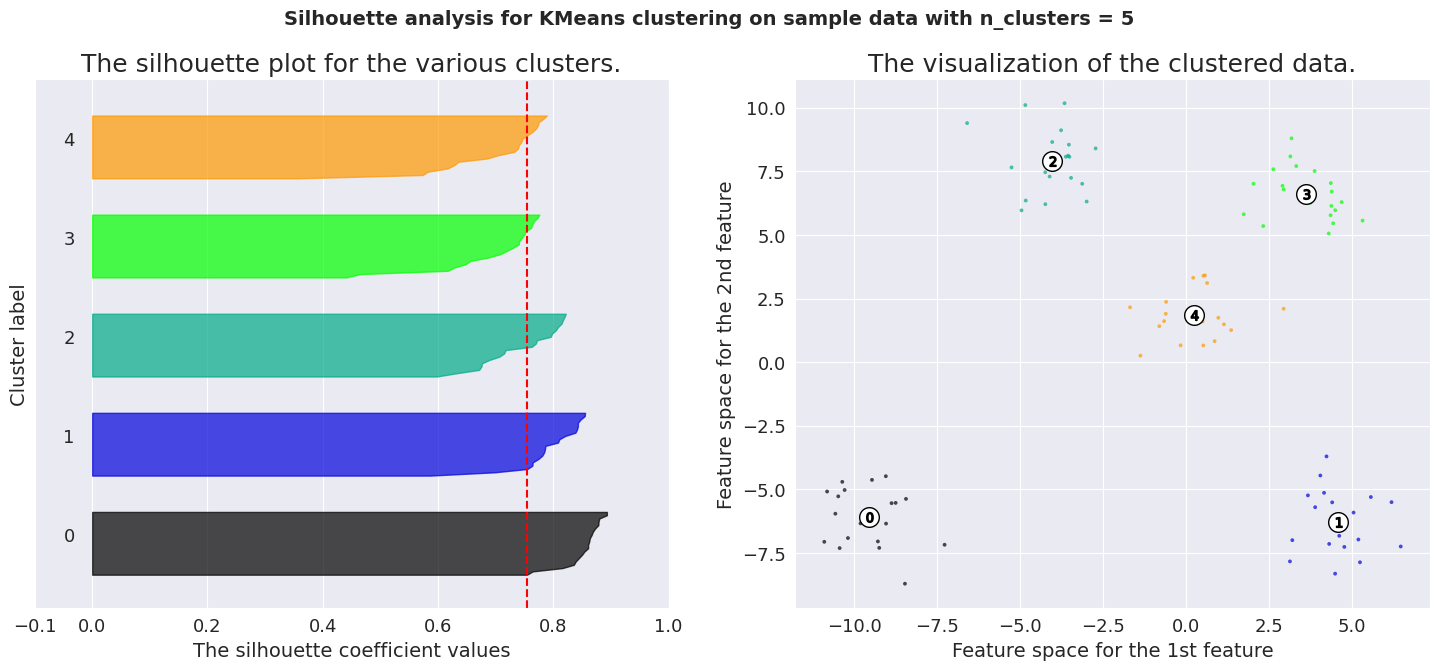

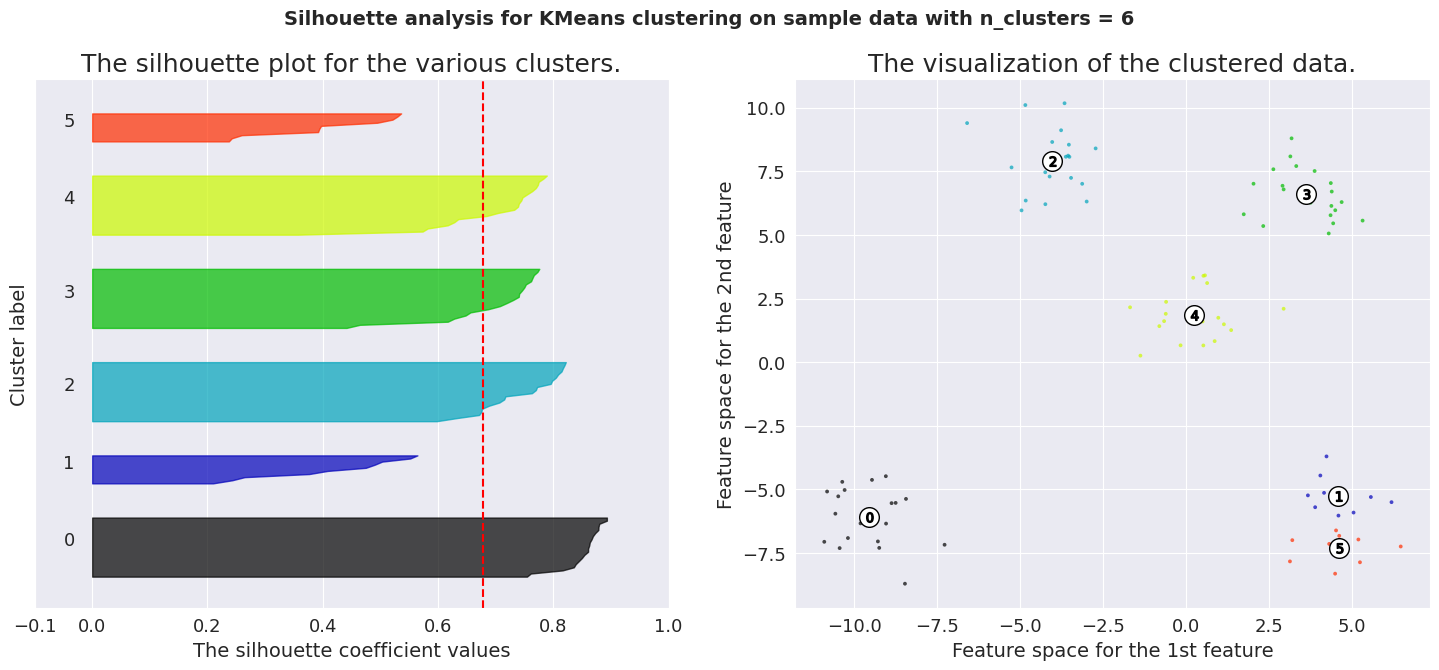

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k", cmap='plasma'
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Real world Case

[Link to dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [ ]:
mall_df = pd.read_csv("/content/Mall_Customers.csv")
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X_mall = mall_df[[ 'Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()
X_mall

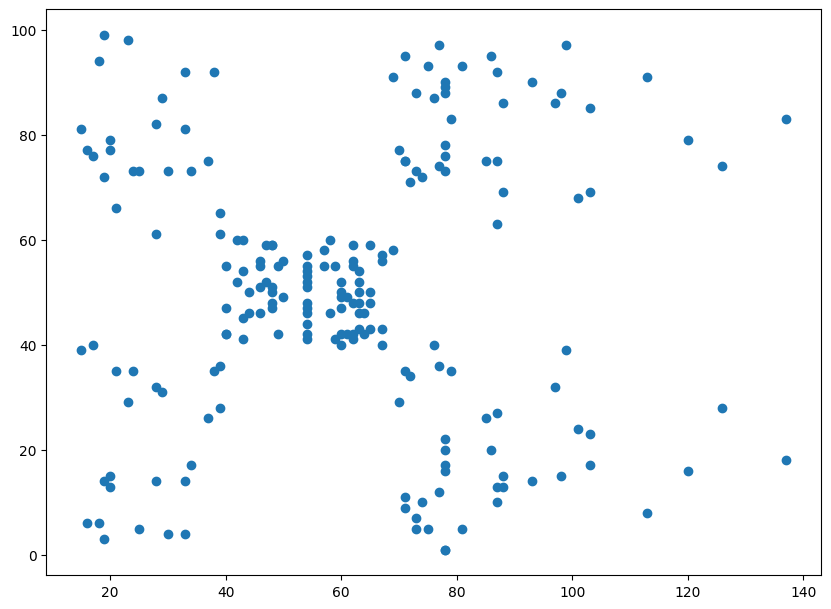

In [ ]:
plt.scatter(X_mall[:, 0], X_mall[:, 1]);

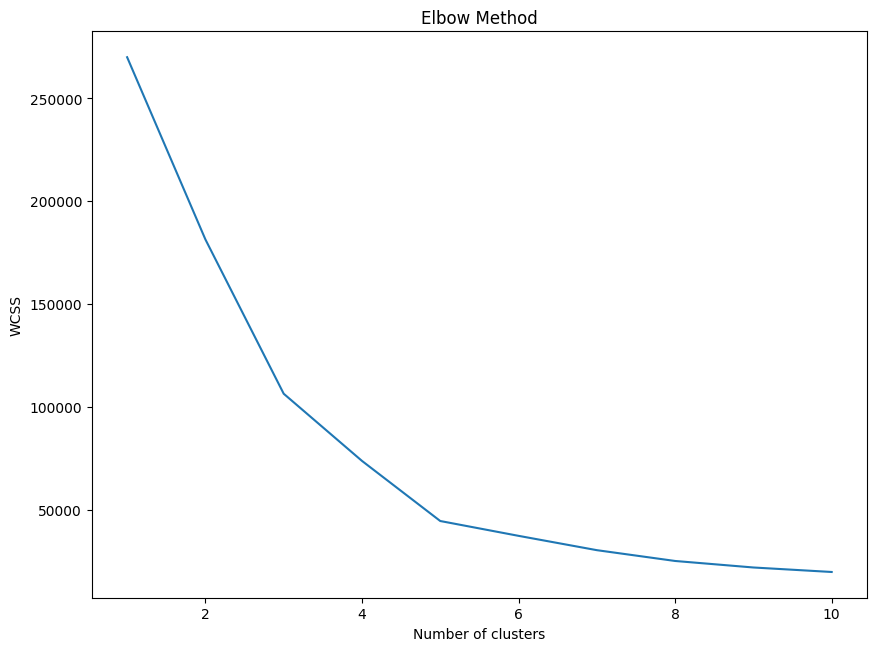

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_mall)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Now that we know what the optimal value of K is we can finalise it. 
- k-means++ ensures that you get don’t fall into the random initialization trap.

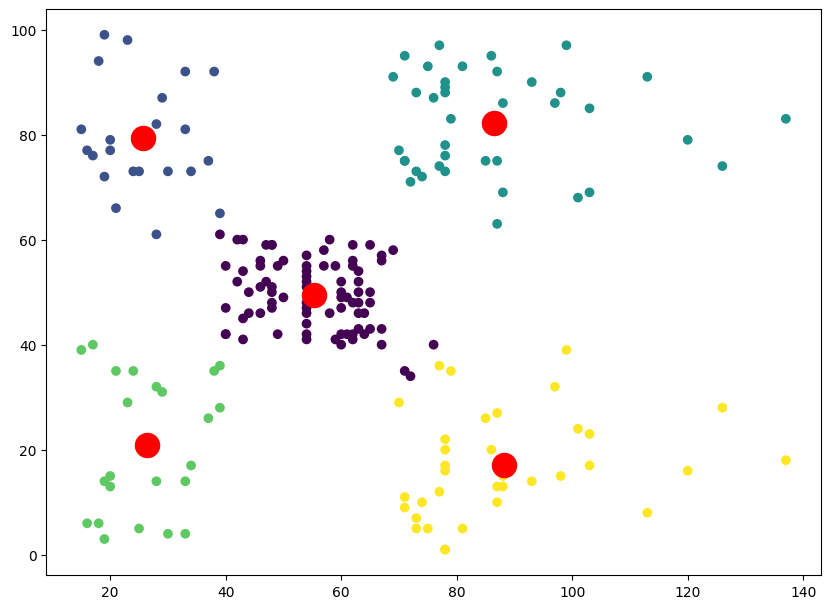

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_mall)
plt.scatter(X_mall[:,0], X_mall[:,1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Fun Work: Try coding WCSS from scratch! 

The formula is given in the ppt. I believe that someone who is able to write an algorithm from scratch is completely thorough with the theory and math behind it! 

THANK YOU AND ALL THE BEST!

# References 

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- https://scikit-learn.org/stable/modules/clustering.html

- https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25

- https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42
